# Libraries and Data

In [ ]:
! pip install opendatasets

In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Download the dataset
od.download("https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omniasaaid
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data


100%|██████████| 22.0k/22.0k [00:00<00:00, 18.7MB/s]

In [ ]:
# Loading the Data of weekly customer complaints
# and set the date as the index
train_df = pd.read_csv("/content/daily-climate-time-series-data/DailyDelhiClimateTrain.csv")
train_df['Date'] = pd.to_datetime(train_df['date'], format = '%Y-%m-%d')
train_df.set_index('Date', inplace = True)
print(train_df.head())

test_df = pd.read_csv("/content/daily-climate-time-series-data/DailyDelhiClimateTest.csv")
test_df['Date'] = pd.to_datetime(test_df['date'], format = '%Y-%m-%d')
test_df.set_index('Date', inplace = True)
print(test_df.head())

                  date   meantemp   humidity  wind_speed  meanpressure
Date                                                                  
2013-01-01  2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03  2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04  2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05  2013-01-05   6.000000  86.833333    3.700000   1016.500000
                  date   meantemp   humidity  wind_speed  meanpressure
Date                                                                  
2017-01-01  2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [ ]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


# Data Pre-processing

In [ ]:
# Remove comma from column 'complaints' and transform the values into float
df['complaints'] = df['complaints'].str.replace(',', '').astype(float)
df.head()

,complaints,discount_rate,small_commercial_event,medium_commercial_event,big_commercial_event
week,,,,,
2018-01-01,1750.0,37.26%,1,0,0
2018-01-08,1701.0,35.38%,0,0,0
2018-01-15,1711.0,36.22%,1,0,0
2018-01-22,1443.0,38.33%,1,0,0
2018-01-29,1397.0,36.34%,0,0,0


In [ ]:
# df.asfreq("W-Mon") - convert the time series data to a specified frequency, in this case, weekly data with Monday as the anchor day.
# Setting freq to W implies that the week starts on a Sunday
df = df.asfreq("W-Mon")
df.index

DatetimeIndex(['2018-01-01', '2018-01-08', '2018-01-15', '2018-01-22',
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05',
               ...
               '2022-10-24', '2022-10-31', '2022-11-07', '2022-11-14',
               '2022-11-21', '2022-11-28', '2022-12-05', '2022-12-12',
               '2022-12-19', '2022-12-26'],
              dtype='datetime64[ns]', name='week', length=261, freq='W-MON')

A list of commonly used frequency aliases:

Time-based frequencies:

- 'D': Calendar day frequency
- 'B': Business day frequency
- 'W': Weekly frequency
- 'W-MON', 'W-TUE', ..., 'W-SUN': Weekly frequency (anchored on a specific day)
- 'M': Month end frequency
- 'MS': Month start frequency
- 'Q': Quarter end frequency
- 'QS': Quarter start frequency
- 'A' or 'Y': Year end frequency
- 'BA' or 'BY': Business year end frequency
- 'AS' or 'YS': Year start frequency
- 'BAS' or 'BYS': Business year start frequency


Hourly, minutely, and secondly frequencies:

- 'H': Hourly frequency
- 'T' or 'min': Minutely frequency
- 'S': Secondly frequency


You can also use multiples, like:

- '2D': Every 2 days
- '4H': Every 4 hours
- '15T' or '15min': Every 15 minutes

# Exploratory Data Analysis

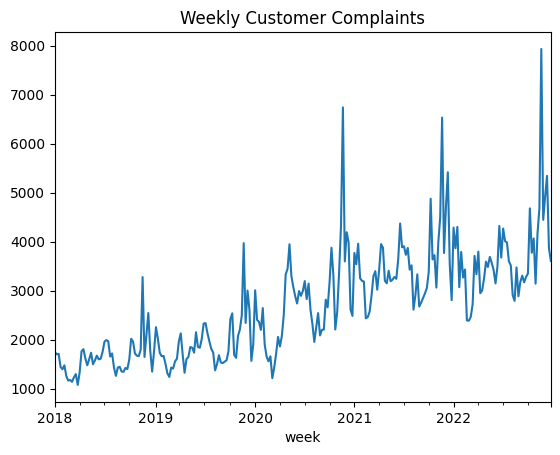

In [ ]:
# Plot the weekly complaint values
df['complaints'].plot(title = 'Weekly Customer Complaints')
plt.show()

C:\Users\Breadfast\AppData\Local\Temp\ipykernel_14984\1762524373.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['complaints'].resample('M').mean(),


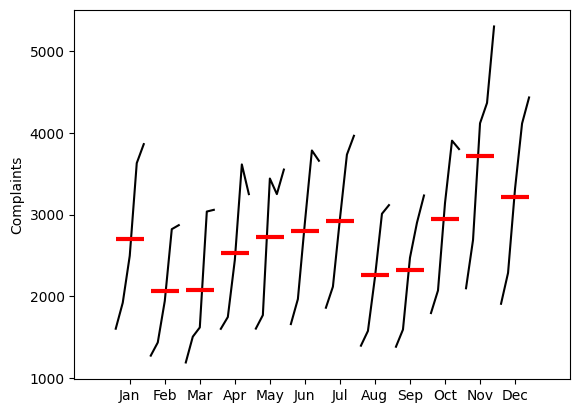

In [ ]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of the complaint values
month_plot(df['complaints'].resample('M').mean(),
           ylabel = 'Complaints')
plt.show()

C:\Users\Breadfast\AppData\Local\Temp\ipykernel_14984\1486698043.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['complaints'].resample('Q').mean(),


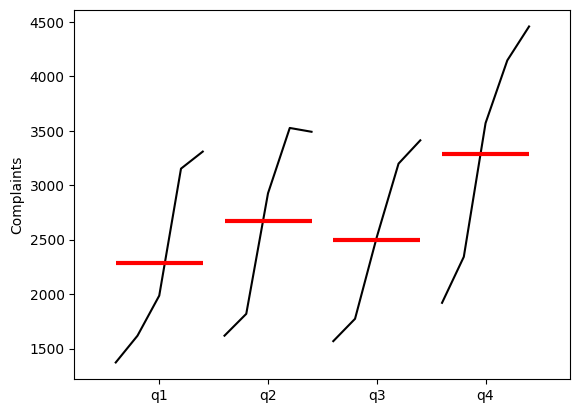

In [ ]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of the complaint values
quarter_plot(df['complaints'].resample('Q').mean(),
           ylabel = 'Complaints')
plt.show()

`seasonal_decompose` - To decompose a time series into its constituent parts to better understand the underlying patterns.

components

- Trend: The overall direction of the series (increasing, decreasing, or stable).
- Seasonal: Repeating patterns at fixed intervals (e.g., daily, weekly, monthly).
- Residual: The remaining variation after removing trend and seasonal components.

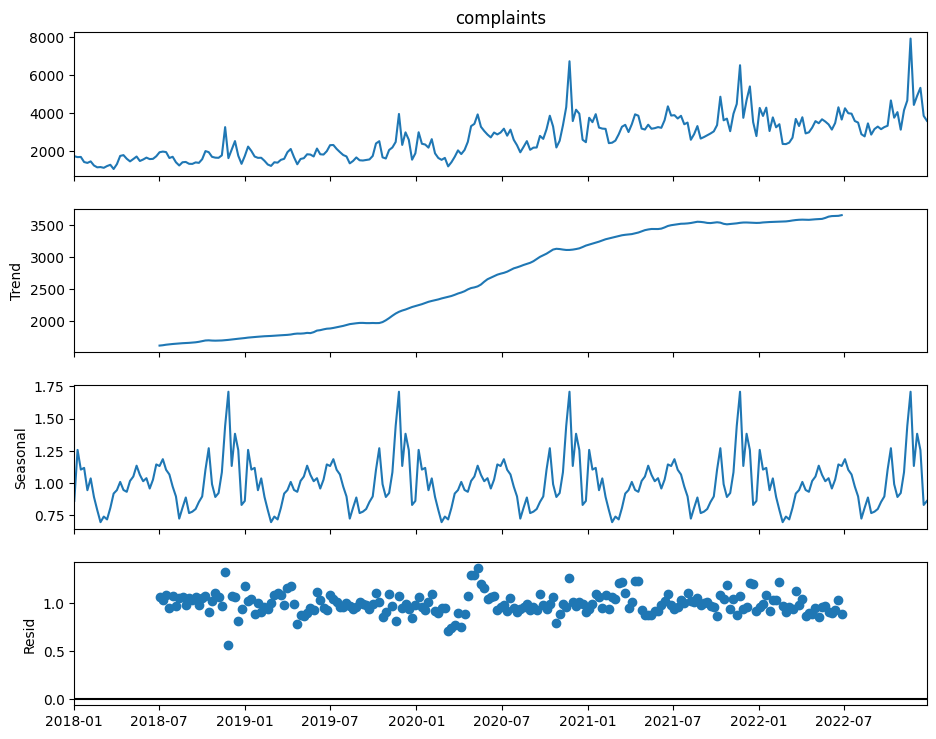

In [ ]:
# Seasonal Decomposition Plots for complaint values
# Multiplicative model type, with yearly seasonality (52 weeks)
decomposition = seasonal_decompose(df['complaints'],
                                   model = 'mul',
                                   period = 52)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.


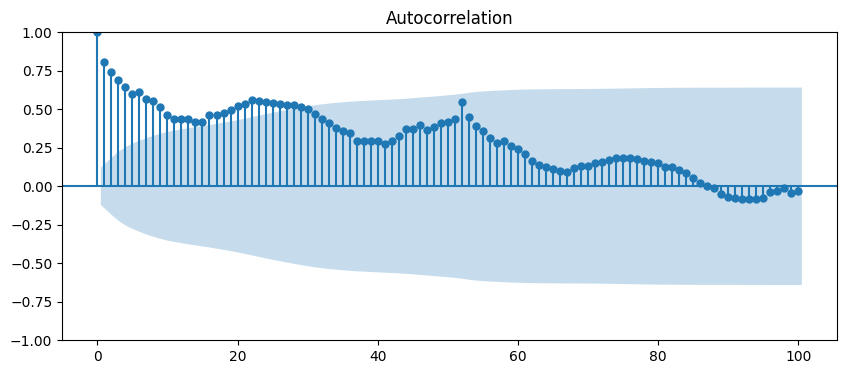

In [ ]:
# Plot the autocorrelation (ACF) of complaint values
fig, ax = plt.subplots(figsize = (10,4))
plot_acf(df['complaints'], lags = 100, ax = ax)
plt.show()

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

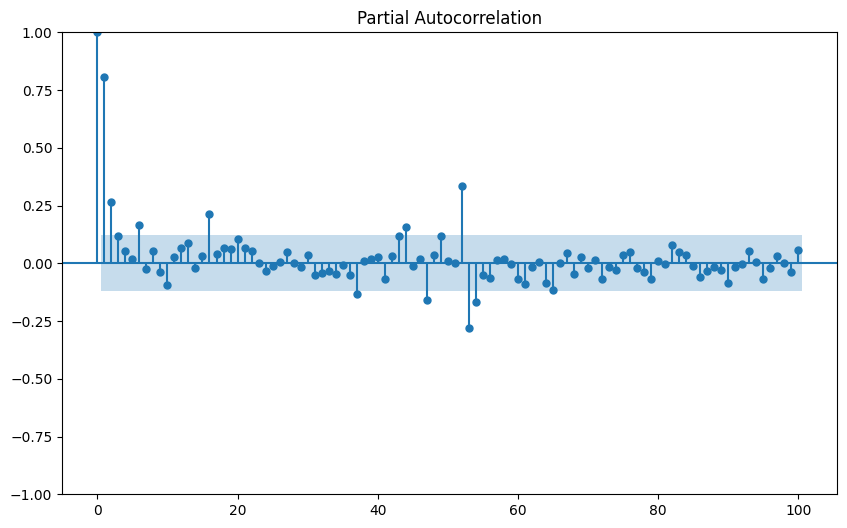

In [ ]:
# Plot the partial autocorrelation (PACF) of complaint values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['complaints'], lags = 100, ax = ax)
plt.show()

# Training and test

# Goal : to predict the next quarter (13 weeks)

In [ ]:
train_df = train_df[['meantemp']]
test_df = test_df[['meantemp']]

print(train_df.head())
print(test_df.head())

             meantemp
Date                 
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000
             meantemp
Date                 
2017-01-01  15.913043
2017-01-02  18.500000
2017-01-03  17.111111
2017-01-04  18.700000
2017-01-05  18.388889


In [ ]:
# Training and Test Split
# Train: all data except last n periods of the column 'complaints'
# Test: last n periods of the column 'complaints'

#periods = 13
#train, test = df.iloc[:-periods,0], df.iloc[-periods:, 0 ]
test_df.head()

,meantemp
Date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889


# Simple Exponential Smoothing

Simple Exponential Smoothing assigns exponentially decreasing weights to past observations, giving more influence to recent data.

It is especially useful when there is no clear trend or seasonal pattern.

In [ ]:
# Create a Simple Exponential Smoothing model using the training data.
model_simple = SimpleExpSmoothing(train_df).fit()

# Use the fitted model to forecast future values.
# The forecast is made for the same length as the 'test' data set.
predictions_simple = model_simple.forecast(len(test_df))

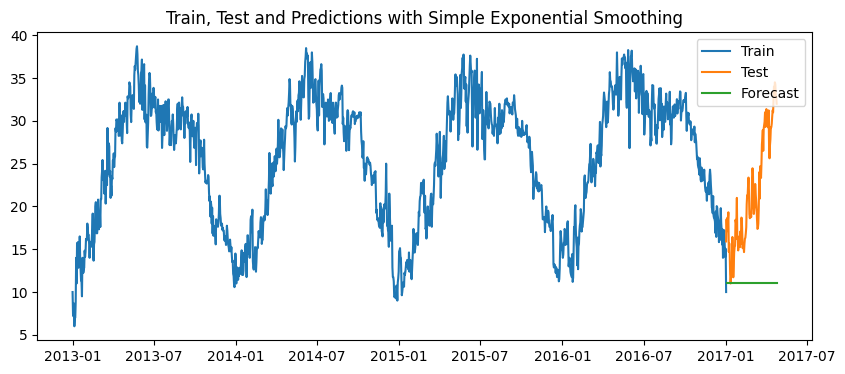

In [ ]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot the train, test, and forecast data
plt.plot(train_df, label = 'Train')
plt.plot(test_df, label = 'Test')
plt.plot(predictions_simple, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Simple Exponential Smoothing")
plt.legend()
plt.show()

# Double Exponential Smoothing

Double Exponential Smoothing (DES), also known as Holt’s Linear Trend Model, is used when the time series data exhibits a trend.

Unlike Simple Exponential Smoothing, which is suitable for data without trends or seasonality, DES can account for both the level and the trend in the data

Key Features:
- Trend Handling -  making it suitable for time series data that show a consistent upward or downward trend over time.
- Components - DES involves two components: the level (smoothed value) and the trend.

In [ ]:
# Double Exponential Smoothing Model
# Initialize and fit an Exponential Smoothing model to the training data
# Use a multiplicative trend component ('mul') and no seasonal component (seasonal=None)

#El model el mafroud yb2a esmo Holt Winters bas el library msamyaah exponential smoothing

model_double = ExponentialSmoothing(train_df,
                                    trend = 'mul',
                                    seasonal = None).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
# Use the fitted Double Exponential Smoothing model to forecast future values.
# The forecast is made for the same length as the 'test' data set.
predictions_double = model_double.forecast(len(test_df))
predictions_double

,0
2017-01-02,11.057738
2017-01-03,11.044972
2017-01-04,11.032221
2017-01-05,11.019485
2017-01-06,11.006763
2017-01-07,10.994057
2017-01-08,10.981364
2017-01-09,10.968687
2017-01-10,10.956024
2017-01-11,10.943375


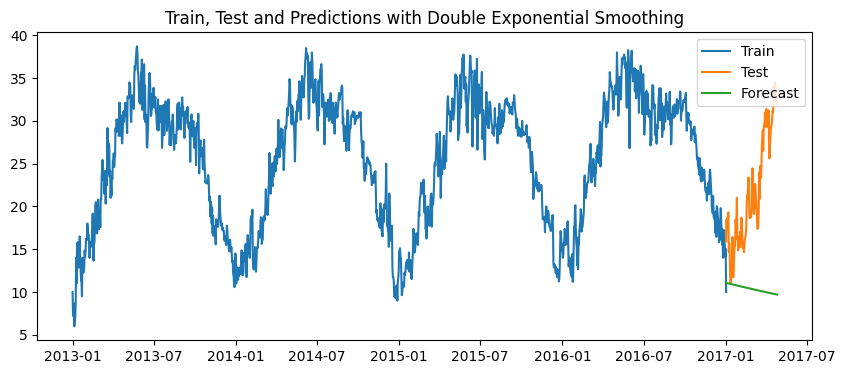

In [ ]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train_df, label = 'Train')
plt.plot(test_df, label = 'Test')
plt.plot(predictions_double, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Double Exponential Smoothing")
plt.legend()
plt.show()

# Triple Exponential Smoothing (Holt-Winters method)

Triple Exponential Smoothing, also known as Holt-Winters Exponential Smoothing, extends Double Exponential Smoothing by adding a seasonal component to handle data with seasonal patterns in addition to trends.

Key Features:
- Seasonality Handling - Triple Exponential Smoothing accommodates time series data with seasonal patterns, which can be daily, weekly, monthly, quarterly, or annual.
- Components - It involves three components: level (smoothed value), trend, and seasonal.

In [ ]:
# Triple Exponential Smoothing Model
# Initialize and fit a Triple Exponential Smoothing (Holt-Winters) model to the training data
# Use an additive trend component ('add'), a multiplicative seasonal component ('mul'),
# and specify the seasonal period length as 52 (weekly data with yearly seasonality)

model_triple = ExponentialSmoothing(train_df,
                                    trend = 'mul',
                                    seasonal = "mul",
                                    seasonal_periods = 365).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
# Use the fitted Triple Exponential Smoothing model to forecast future values.
# The forecast is made for the same length as the 'test' data set.
predictions_triple = model_triple.forecast(len(test_df))
predictions_triple

,0
2017-01-02,11.427525
2017-01-03,11.911181
2017-01-04,11.521040
2017-01-05,11.437817
2017-01-06,11.098705
2017-01-07,10.896554
2017-01-08,12.294305
2017-01-09,11.750363
2017-01-10,12.747022
2017-01-11,13.153764


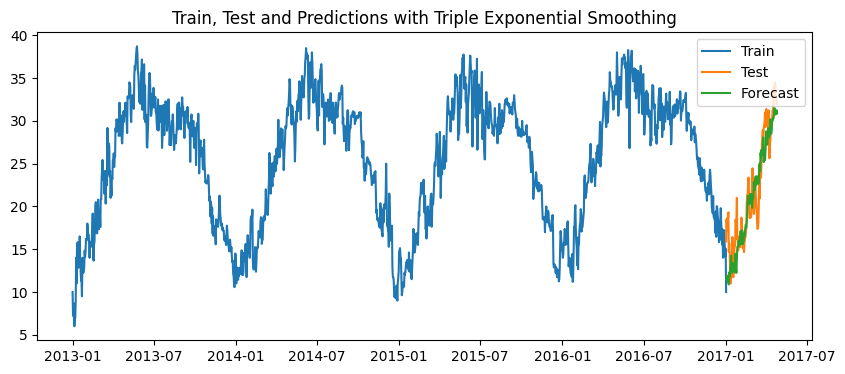

In [ ]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train, test, and forecasts values
plt.plot(train_df, label = 'Train')
plt.plot(test_df, label = 'Test')
plt.plot(predictions_triple, label = "Forecast")

# add title and legend to the plot
plt.title("Train, Test and Predictions with Triple Exponential Smoothing")
plt.legend()
plt.show()

- `MAE` - the average of the absolute differences between predicted and actual values.
- `RMSE` - the square root of the average of squared differences between prediction and actual observation.
It gives a relatively high weight to large errors, making it sensitive to outliers.
- `MAPE` - the size of the error in percentage terms. the average of the absolute percent errors of forecasts, which helps to understand the accuracy in terms of percentage.

In [ ]:
from math import sqrt


# Calculating the MAE, RMSE, and MAPE
# between the test values and our prediction values
mae = mean_absolute_error(test_df, predictions_triple)
rmse = sqrt(mean_squared_error(test_df, predictions_triple))
mape = mean_absolute_percentage_error(test_df, predictions_triple)

print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 2.29
The RMSE is 2.88
The MAPE is 11.38 %


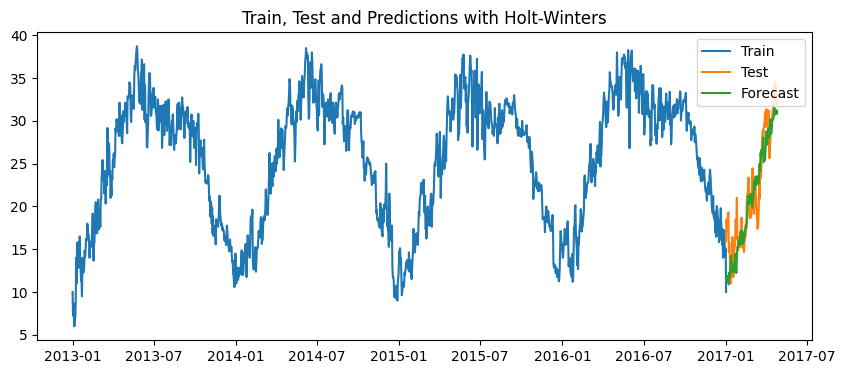

The MAE is 2.29
The RMSE is 2.88
The MAPE is 11.38 %


In [ ]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Plot training, test, and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = sqrt(mean_squared_error(test, predictions))
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

# Call the model_assessment function with the specified arguments
model_assessment(train_df['2013-01':], test_df, predictions_triple, "Holt-Winters")

# Predicting the future

In [ ]:
# Initialize and fit a Triple Exponential Smoothing (Holt-Winters) model to the whole data
# Use an additive trend component ('add'), a multiplicative seasonal component ('mul'),
# and specify the seasonal period length as 52 (weekly data with yearly seasonality)
model = ExponentialSmoothing(train_df,
                             trend = 'add',
                             seasonal = "mul",
                             seasonal_periods = 365).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
 # Predict the values for the next 13 weeks
forecast = model.forecast(365)
forecast

,0
2017-01-02,11.445007
2017-01-03,11.951846
2017-01-04,11.580044
2017-01-05,11.516941
2017-01-06,11.192950
2017-01-07,11.024896
2017-01-08,12.481127
2017-01-09,11.954079
2017-01-10,13.032023
2017-01-11,13.479069


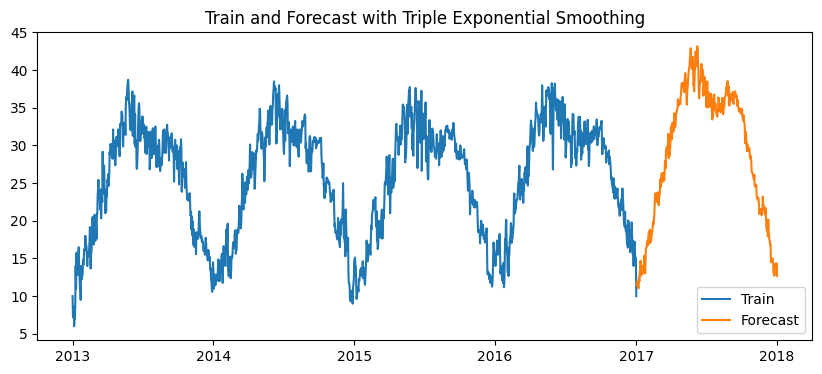

In [ ]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize = (10,4))

# Plot train and forecast values
plt.plot(train_df, label = 'Train')
plt.plot(forecast, label = "Forecast")

# Add title and legend to the plot
plt.title("Train and Forecast with Triple Exponential Smoothing")
plt.legend()
plt.show()

In [ ]:
# Function to plot the train and forecast values
def plot_future(y, forecast, title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot train and forecast values
  plt.plot(df.complaints, label = 'Train')
  plt.plot(forecast, label = "Forecast")
  # Add title and legend to the plot
  plt.title("Train and Forecast with Triple Exponential Smoothing")
  plt.legend()
  plt.show()

# Daily Data


In [ ]:
# Loading the bitcoin data and Setting the Index
#df_daily = pd.read_csv("bitcoin_price.csv", index_col = "Date", parse_dates = True)
#df_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
# Display information about the DataFrame, including data types and non-null counts
#df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2014-09-17 to 2023-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3392 non-null   float64
 1   High       3392 non-null   float64
 2   Low        3392 non-null   float64
 3   Close      3392 non-null   float64
 4   Adj Close  3392 non-null   float64
 5   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.5 KB


In [ ]:
# Convert the DataFrame to have a daily frequency.
# This ensures that the time series is indexed by every calendar day.
train_df = train_df.asfreq("D")
train_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='Date', length=1462, freq='D')

In [ ]:
# Define the number of days to be used for the test set
periods = 30
# Split the data into training and test sets, taking the 4th column ('Close')
#train, test = df_daily.iloc[:-periods,3], df_daily.iloc[-periods:, 3 ]
test_df.head()

,meantemp
Date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889


In [ ]:
# Initialize and fit a Triple Exponential Smoothing (Holt-Winters) model to the training data
# Use an additive trend component ('add'), a multiplicative seasonal component ('mul'),
# and specify the seasonal period length as 7 (daily data with weekly seasonality)

model_triple = ExponentialSmoothing(train_df,
                                    trend = 'mul',
                                    seasonal = "mul",
                                    seasonal_periods = 365).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
# Use the fitted Triple Exponential Smoothing model to forecast future values.
# The forecast is made for the same length as the 'test' data set. (30 days)
predictions_triple = model_triple.forecast(len(test_df))
predictions_triple

,0
2017-01-02,11.427525
2017-01-03,11.911181
2017-01-04,11.521040
2017-01-05,11.437817
2017-01-06,11.098705
2017-01-07,10.896554
2017-01-08,12.294305
2017-01-09,11.750363
2017-01-10,12.747022
2017-01-11,13.153764


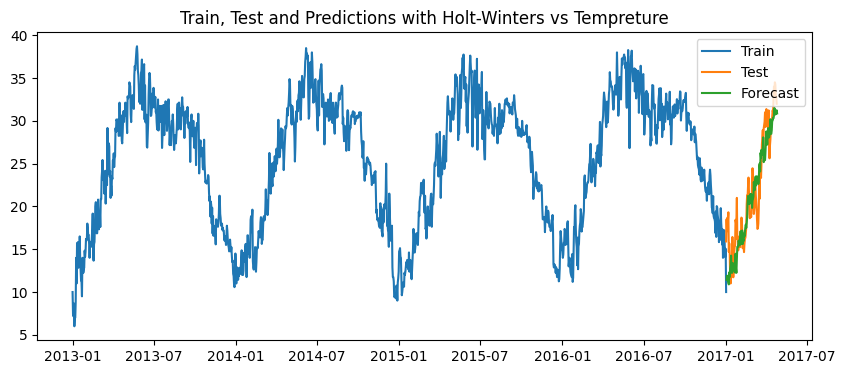

The MAE is 2.29
The RMSE is 2.88
The MAPE is 11.38 %


In [ ]:
# Model Assessment
# Assess the performance of the model
# using test data starting from 2013-01, comparing its predictions to the actual values of Bitcoin prices.
model_assessment(train_df['2013-01':], test_df, predictions_triple, "Holt-Winters vs Tempreture")